In [1]:
import math
import sympy

class CircuitBipolaire(object):
    def admittance(self, freq):
        return 1/self.impedance(freq)
    
    def __add__(self, other):
        return Serie(self, other)

    def __or__(self, other):
        return Parallel(self, other)
    
class CircuitElementaire(CircuitBipolaire):
    def __init__(self, val):
        self.val = val
    
    def __repr__(self):
        return f'{self.__class__.__name__}({self.val})' 
    
    def __str__(self):
        initiale = self.__class__.__name__[0]
        return f'{initiale}({self.val})' 


class Resistance(CircuitElementaire):
    def impedance(self, freq):
        return self.val

class Condensateur(CircuitElementaire):
    def impedance(self, freq):
        return 1/(2*self.val*math.pi*freq*1J)
    
class Inductance(CircuitElementaire):
    def impedance(self, freq):
        return (2*self.val*math.pi*freq*1J)

    
class CircuitCompose(CircuitBipolaire):
    def __init__(self, circ1, circ2):
        self.circ1 = circ1
        self.circ2 = circ2
        
    def __repr__(self):
        return f'{self.__class__.__name__}({self.circ1!r}, {self.circ2!r})' 

class Parallel(CircuitCompose):
    def impedance(self, freq):
        Z1, Z2 = self.circ1.impedance(freq), self.circ2.impedance(freq)
        return Z1*Z2/(Z1+Z2)
        
    def __str__(self):
        return f'({self.circ1!s} | {self.circ2!s})'

class Serie(CircuitCompose):
    def impedance(self, freq):
        return self.circ1.impedance(freq) + self.circ2.impedance(freq)

    def __str__(self):
        return f'({self.circ1!s} + {self.circ2!s})'

    

R1 = Resistance(10)
C1 = Condensateur(10E-6)
print(R1) # R(10)
Parallel(R1, C1).impedance(1000)
R1|C1

R(10)


Parallel(Resistance(10), Condensateur(1e-05))

In [2]:
R1 = Resistance(10)
R2 = Resistance(5)
L1 = Inductance(15E-6)
C1 = Condensateur(10E-6)
circuit = R2 + (L1|R1|C1)

Text(0.5, 0, 'Frequency (Hz)')

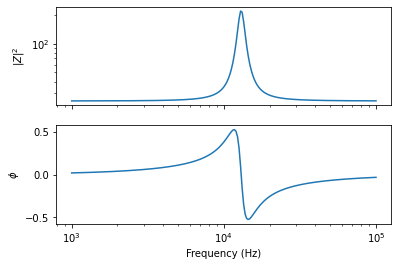

In [3]:
import numpy as np
from matplotlib.pyplot import figure
fig = figure()
ax1, ax2 = fig.subplots(2, 1, sharex=True)

Tfreq = np.logspace(3, 5, 201)
Z = circuit.impedance(Tfreq)

ax1.loglog(Tfreq, np.abs(Z)**2)
ax1.set_ylabel('$|Z|^2$')
ax2.semilogx(Tfreq, np.angle(Z))
ax2.set_ylabel('$\phi$')
ax2.set_xlabel('Frequency (Hz)')
